In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/breast-cancer-wisconsin-data


In [2]:
!mv -f /kaggle/input/breast-cancer-wisconsin-data/data.csv /content

mv: cannot remove '/kaggle/input/breast-cancer-wisconsin-data/data.csv': Read-only file system


In [17]:
# Step 1: Import Libraries and Load the Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Load the dataset
df = pd.read_csv('data.csv')
print("Dataset loaded successfully!")

print("\nInitial Data Glance:")
print(df.head())

print("\n" + "="*50 + "\n")

print("DataFrame Info:")
df.info()
print("\n" + "="*50 + "\n")




Dataset loaded successfully!

Initial Data Glance:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  tex

In [18]:
# Step 2: Preprocess and Clean the Data

#  copy of the DataFrame to perform preprocessing
df_processed = df.copy()

# Drop irrelevant columns: 'id' and 'Unnamed: 32'
df_processed = df_processed.drop(['id', 'Unnamed: 32'], axis=1)

# Convert the 'diagnosis' column to a numerical format (Label Encoding)
# 'M' (Malignant) will be mapped to 1, and 'B' (Benign) to 0
df_processed['diagnosis'] = df_processed['diagnosis'].map({'M': 1, 'B': 0})

print("DataFrame after Preprocessing:")
print(df_processed.head())

print("\n" + "="*50 + "\n")

print("Final DataFrame Info:")
df_processed.info()

DataFrame after Preprocessing:
   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.24

In [19]:
# Step 3: Define Features and Target & Split the Data

# Define the features (X) and the target variable (y)
X = df_processed.drop('diagnosis', axis=1)
y = df_processed['diagnosis']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (455, 30)
X_test shape: (114, 30)
y_train shape: (455,)
y_test shape: (114,)


In [20]:
# Step 4: Standardize Features

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features have been standardized successfully!")

Features have been standardized successfully!


Logistic Regression model has been trained successfully!

Confusion Matrix (Default Threshold):
[[70  1]
 [ 2 41]]


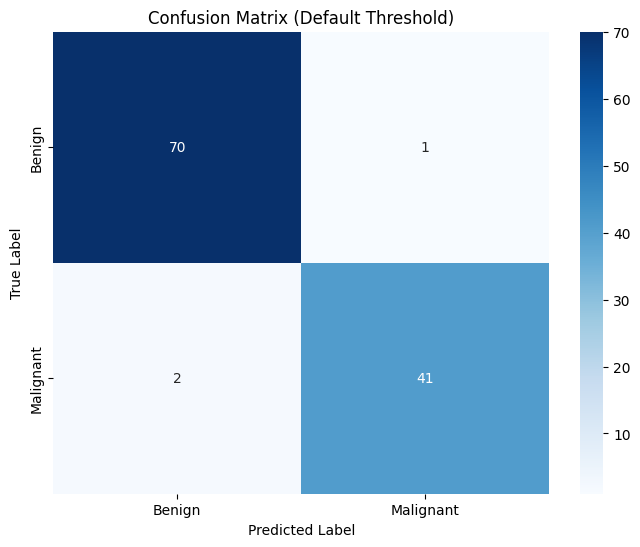


Precision: 0.98
Recall: 0.95
F1 Score: 0.96
ROC-AUC Score: 1.00


In [21]:
# Step 5: Fit and Evaluate the Logistic Regression Model

# Create and train the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)
print("Logistic Regression model has been trained successfully!")

# Make predictions on the scaled test set using the default threshold (0.5)
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model with a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix (Default Threshold):")
print(cm)

# Plot the Confusion Matrix for better clarity
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Default Threshold)')
plt.show()

# Calculate precision, recall, and F1 score with the default threshold
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"\nPrecision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")


Confusion Matrix (Threshold=0.3):
[[67  4]
 [ 1 42]]
Precision: 0.91
Recall: 0.98


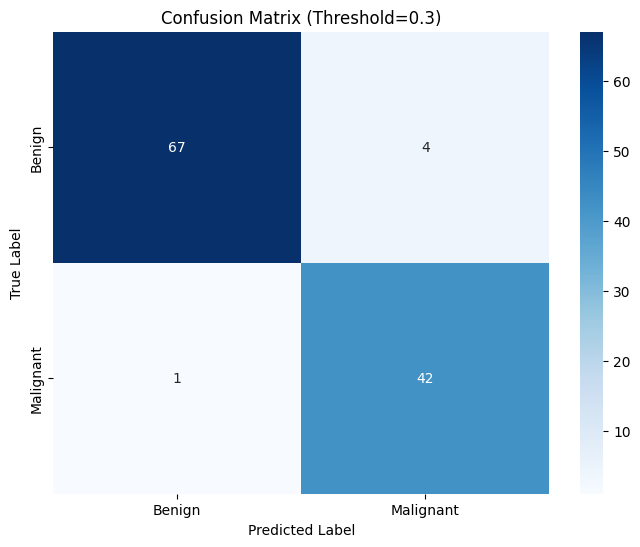

In [23]:
# Step 6: Tune the Threshold

# The default threshold is 0.5. For this medical task, a False Negative (missed diagnosis) is
# more costly than a False Positive (false alarm). We'll lower the threshold
# to increase the model's sensitivity (recall) and catch more true positives.
new_threshold = 0.3

# Create new predictions based on the custom threshold
y_pred_tuned = (y_pred_proba >= new_threshold).astype(int)

# Evaluate the model's performance with the new threshold
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned)
recall_tuned = recall_score(y_test, y_pred_tuned)

print(f"\nConfusion Matrix (Threshold={new_threshold}):")
print(cm_tuned)
print(f"Precision: {precision_tuned:.2f}")
print(f"Recall: {recall_tuned:.2f}")

# Plot the new Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix (Threshold={new_threshold})')
plt.show()

# Inference:
# By lowering the threshold, we caught the one False Negative from the previous model (recall improved).
# However, this came at the cost of increasing our False Positives (precision slightly decreased).
# This trade-off is often necessary in critical applications to minimize the most severe type of error.

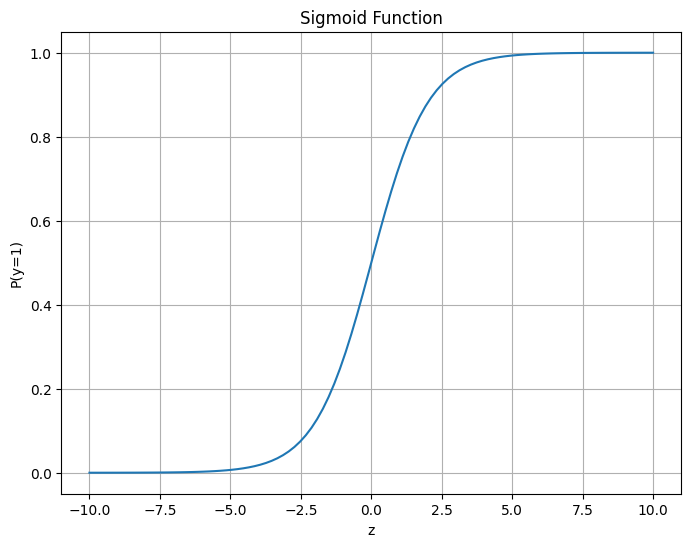

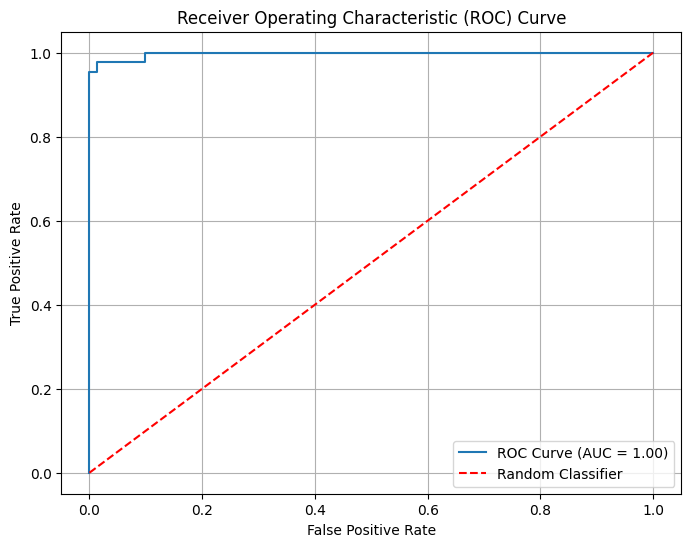

In [24]:
# Step 7: Visualize the Sigmoid Function and ROC Curve

# Plotting the conceptual Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 100)
plt.figure(figsize=(8, 6))
plt.plot(z, sigmoid(z))
plt.title('Sigmoid Function')
plt.xlabel('z')
plt.ylabel('P(y=1)')
plt.grid(True)
plt.show()

# Plotting the ROC-AUC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--', label='Random Classifier')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

### **The Sigmoid Function**
The sigmoid function is the core of logistic regression. It's a special mathematical function that takes any real-valued number and maps it to a value between 0 and 1. This output is then interpreted as a **probability**.

For example, a sigmoid output of 0.8 means there is an 80% probability that the sample belongs to the positive class (in our case, a diagnosis of Malignant). An output of 0.2 means a 20% probability. This allows the model to predict a class label from a continuous probability.

The formula for the sigmoid function is:
$P(y=1) = \frac{1}{1 + e^{-z}}$